<br>
<br>

# <strong>AATCV.<strong>
### IMAGE INPUT EXPERIMENTATION:

<br>
<br>

#### 1.01 STILL IMAGE CAPTURE EXPERIMENTATION.

- First, I needed to experiment with different USB CV webcams. 
- Here is a code block I could run that would allow me to open and close the camera from within the notebook.
- This allowed me to capture images manually with the space bar. 
- These were all saved locally. 
- Tweaks in the code block allowed me to variably title each set of images returned from each caputure session. 

In [ ]:
#Install OpenCV
#pip install opencv-python

In [3]:
#Code block for image capture from USB webcam:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# cam0 = cv2.VideoCapture(0)
# cam0.release()
cam = cv2.VideoCapture(1)
print(type(cam))
img_counter = 0
if not cam.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cam.read()
    width = int(cam.get(3))
    height = int(cam.get(4))
    img = cv2.flip(frame, 1)

#     #Live Otsu Thresholding:
#     img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
#     def filter_image(image, mask):
#         r = image[:,:,0] * mask
#         g = image[:,:,1] * mask
#         b = image[:,:,2] * mask
#         return np.dstack([r,g,b])

#     thresh = threshold_otsu(img_gray)
#     img_otsu  = img_gray > (thresh)
#     filtered = filter_image(img, img_otsu)
    
    # #Live Thresholding
    # img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # twoDimage = img.reshape((-1,3))
    # twoDimage = np.float32(twoDimage)
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # K = 2
    # attempts=2
    # ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    # center = np.uint8(center)
    # res = center[label.flatten()]
    # result_image = res.reshape((img.shape))
    
    #img = cv2.line(img, (0,0), (width, height), (255,255,255), 2)
    #img = cv2.line(img, (0, height),(width, 0), (255,255,255), 1)
    #img = cv2.rectangle(img, (50,50), (1800,1000), (255,255,255), 1)
    #img = cv2.circle(img, (300,300), 60, (0,255,0), -1) ##-1 fills the circle
    #font = cv2.FONT_HERSHEY_PLAIN
    #img = cv2.putText(img, 'IMG', (10,height-10), font, 4, (0,0,0), 5, cv2.LINE_AA)   
    cv2.imshow('IMAGE INTAKE', img)
    k = cv2.waitKey(1)
    if k%256 == 27:
        print("Esc key hit, closing the app")
        break
    elif k%256 == 32:
        #img = cv2.putText(img, 'IMG_10', (10,height-10), font, 4, (0,0,0), 5, cv2.LINE_AA)  
        img_name = "./images/auto_test_1_{}.jpg".format(img_counter)
        cv2.imwrite(img_name, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
        print("{} written!".format(img_name))
        img_counter += 1
cam.release()
cv2.destroyAllWindows()


<class 'cv2.VideoCapture'>
Esc key hit, closing the app


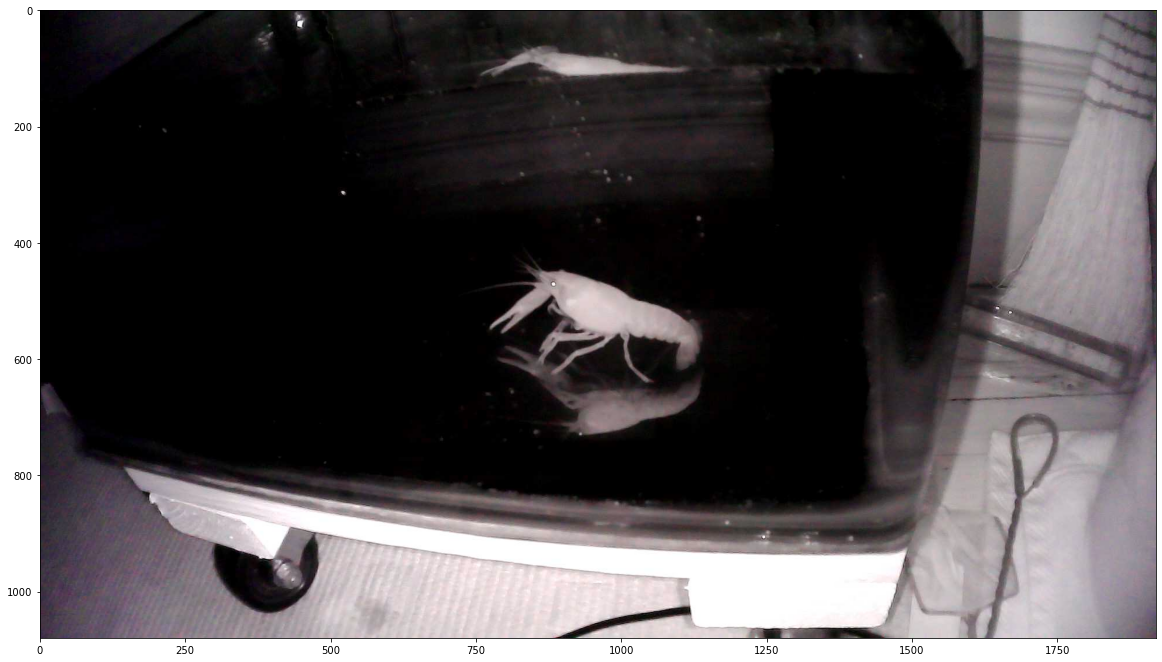

In [17]:
#Codeblock for reading and viewing recorded images:
pic = cv2.imread('./images/shellies_5_4.jpg')
plt.figure(figsize=(20,20))
plt.imshow(pic);

- At the bottom of the ocean, light may sometimes be more available than at other times.
- For this reason, one of the CV cameras I started experimenting with was capable of switching itself to night vision.
- In sufficient lighting, the camera functions like a regular camera, but in low light conditions, the camera turns on a row of infrared LEDs, and the camera picks up the reflectance that this infrared light produces.
- Fortunatley, this led to the discovery that aquatic arthropod exoskeletons fluroesce under infrared light. 

<br>
<br>

#### 1.02 THRESHOLDING EXPERIMENTATION.
##### 1.02.01 K Means Thresholding:

- One of the greater challenges of this project was finding an appropriate image segmentation workflow.
- For this reason, early on, I began experimenting with different edge detection and thresholding options.
- First, I experimented with K-Means thresholding and this performed pretty exceptionally, but proved to be a bit too slow computationally for the live video I'll eventually be working with. 

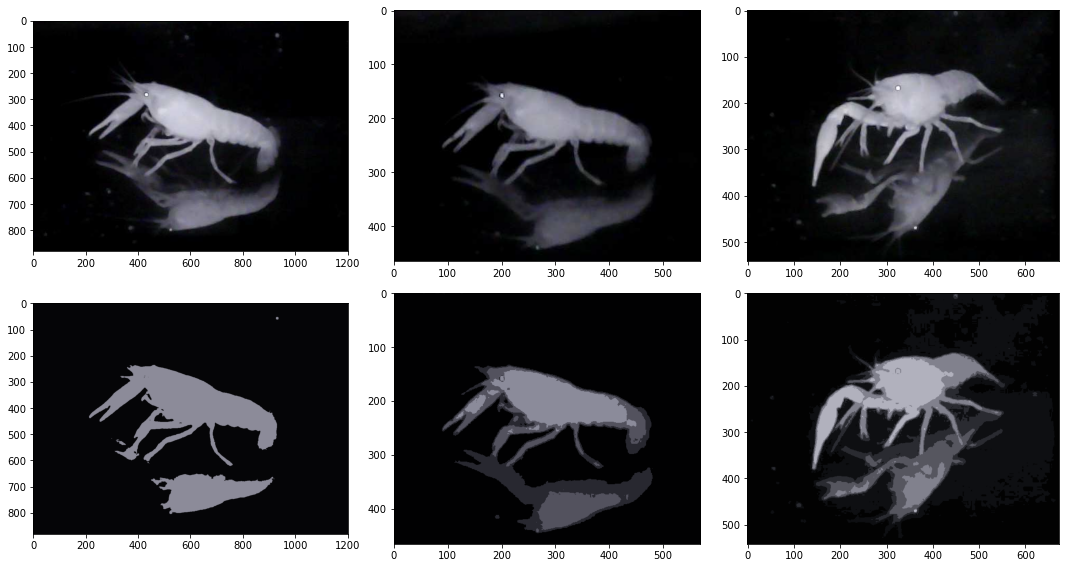

In [2]:
#Segmentation using Kmeans at varying numbers K:
import matplotlib as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
path = './images/s_caps/02.png'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

path2 = './images/s_caps/03.png'
img2 = cv2.imread(path2)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
twoDimage2 = img2.reshape((-1,3))
twoDimage2 = np.float32(twoDimage2)
criteria2 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K2 = 4
attempts2 = 10
ret2,label2,center2=cv2.kmeans(twoDimage2,K2,None,criteria2,attempts2,cv2.KMEANS_PP_CENTERS)
center2 = np.uint8(center2)
res2 = center2[label2.flatten()]
result_image2 = res2.reshape((img2.shape))

path3 = './images/s_caps/04.png'
img3 = cv2.imread(path3)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
twoDimage3 = img3.reshape((-1,3))
twoDimage3 = np.float32(twoDimage3)
criteria3 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K3 = 6
attempts3 = 10
ret3,label3,center3=cv2.kmeans(twoDimage3,K3,None,criteria3,attempts3,cv2.KMEANS_PP_CENTERS)
center3 = np.uint8(center3)
res3 = center3[label3.flatten()]
result_image3 = res3.reshape((img3.shape))

fig2, ax2 = plt.subplots(2, 3, figsize=(15,8))
fig2.tight_layout()
ax2[0, 0].imshow(img);
ax2[0, 1].imshow(img2);
ax2[0, 2].imshow(img3);
ax2[1, 0].imshow(result_image);
ax2[1, 1].imshow(result_image2);
ax2[1, 2].imshow(result_image3);
plt.savefig('./visualizations/test_1.png', transparent=True, bbox_inches = 'tight')

<br>
<br>

##### 1.02.02 Edge Detection:

- Next, I experimented a bit with edge detection.
- This performed the worst of all for the problem I am attending to.
- The edge detection really struggled to isolate the crawfish from their environment.

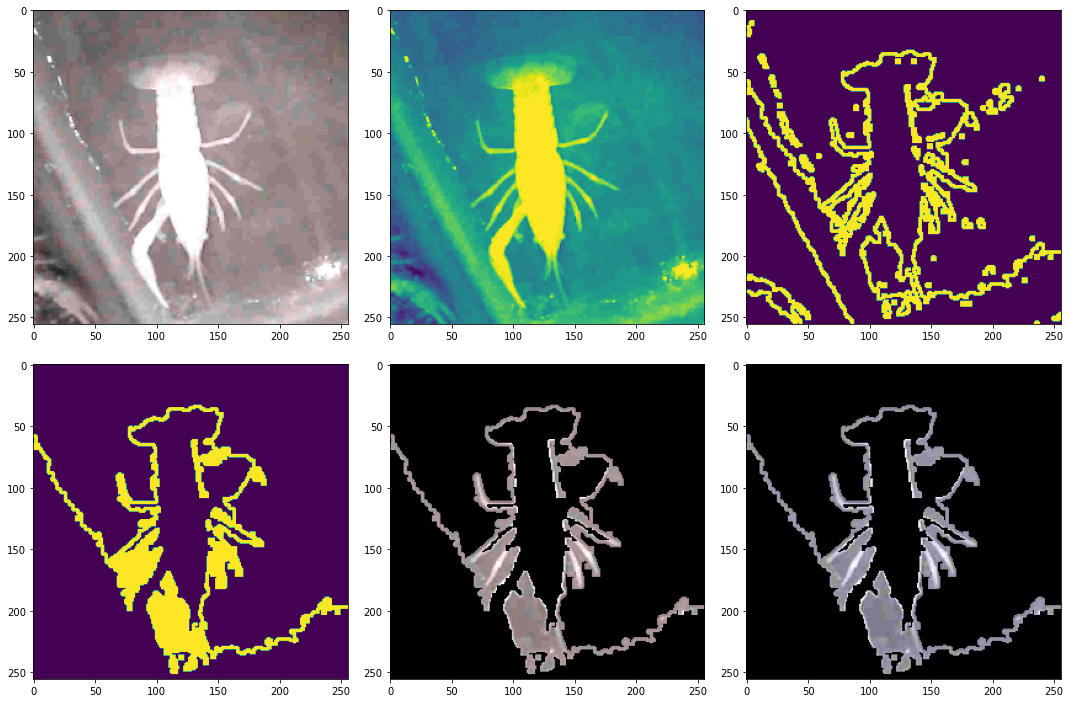

In [20]:
#Edge detection for rapid segmentation:
#https://machinelearningknowledge.ai/image-segmentation-in-python-opencv/
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = './images/s_caps/01.png'
img = cv2.imread(path)
img = cv2.resize(img,(256,256))
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(2, 3, figsize=(15,10))
fig.tight_layout()
ax[0, 0].imshow(img)
ax[0, 1].imshow(gray);
ax[0, 2].imshow(edges);
ax[1, 0].imshow(masked);
ax[1, 1].imshow(dst);
ax[1, 2].imshow(segmented);

<br>
<br>

##### 1.02.03 OTSU Thresholding:

- Next, I experimented with Otsu Thresholding.
- This performed the best in terms of isolating the crawfish from their environment.

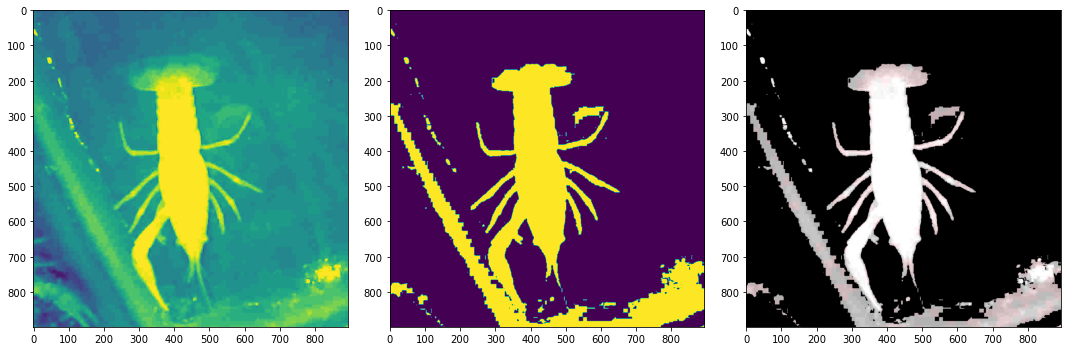

In [21]:
#Segmentation using Otsu Threshold:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='./images/s_caps/01.png'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > thresh
filtered = filter_image(img, img_otsu)

fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(img_gray);
ax2[1].imshow(img_otsu);
ax2[2].imshow(filtered);

<br>
<br>

##### 1.02.03.01 Improving Stage for OTSU Thresholding:

- I then optimized the staging area of the trap to work best with both visible and infrared light.
- This new design vastly improved visibility and reduced noise.

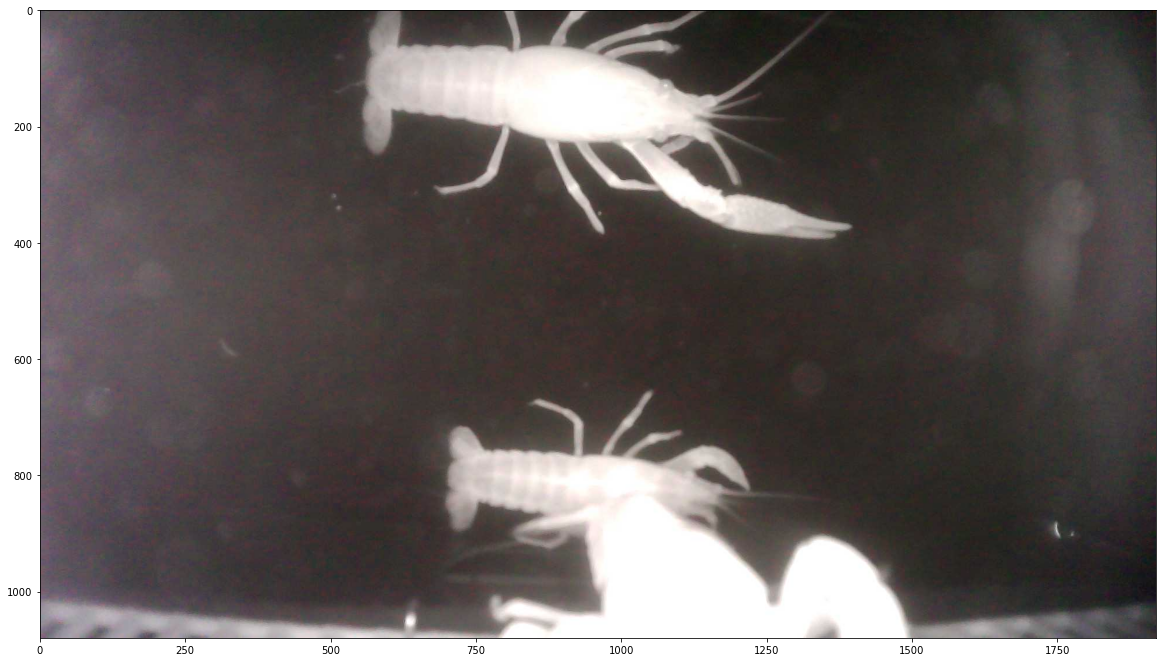

In [26]:
#Codeblock for reading and viewing recorded images:
pic = cv2.imread('./images/angle_test_4_9.jpg')
plt.figure(figsize=(20,20))
plt.imshow(pic);

<br>
<br>

##### 1.02.03.02 OTSU Thresholding at the Edge:

- Based on this new design, I did a series of experiments with OTSU thresholding to better understand the thresholds determined for some images versus those determined for others. 
- When crawfish are at the edge of the frame, they contrast the least with their environment.
- There, they are at the greatest distance from the LED's that make them glow. 
- This reduced contrast is the greatest challenge for the thresholding.
- These images often return the lowest otsu thresholds.

OTSU THRESHOLD :101


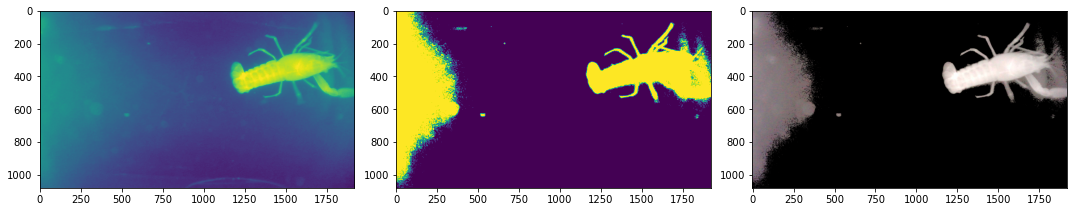

In [138]:
#Segmentation using Otsu Threshold:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='./images/angle_test_2_13.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > (thresh)
filtered = filter_image(img, img_otsu)

fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(img_gray);
ax2[1].imshow(img_otsu);
ax2[2].imshow(filtered);
print('OTSU THRESHOLD :' + str(thresh))

OTSU THRESHOLD :88


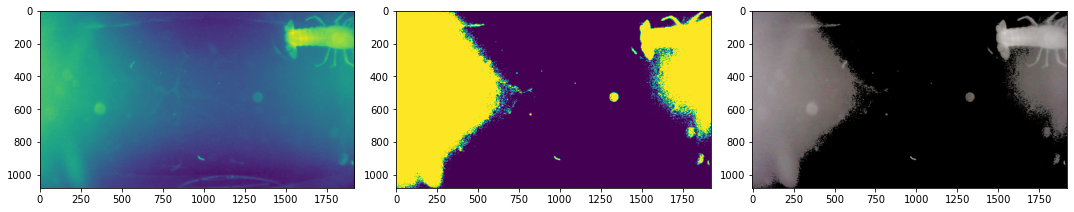

In [137]:
#Segmentation using Otsu Threshold:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='./images/trap_test_4_10.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > (thresh)
filtered = filter_image(img, img_otsu)

fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(img_gray);
ax2[1].imshow(img_otsu);
ax2[2].imshow(filtered);
print('OTSU THRESHOLD :' + str(thresh))

<br>
<br>

##### 1.02.03.03 OTSU Thresholding in the Center:

- Conversely, crawfish located the center of the frame illuminate the most, sometimes almost too much. 
- This can sometimes cause the images to become unfocused, blurring the edges of the crawfish body and again frustrating perfect thresholding.
- These images can often return some of the higher otsu thresholds.

OTSU THRESHOLD :144


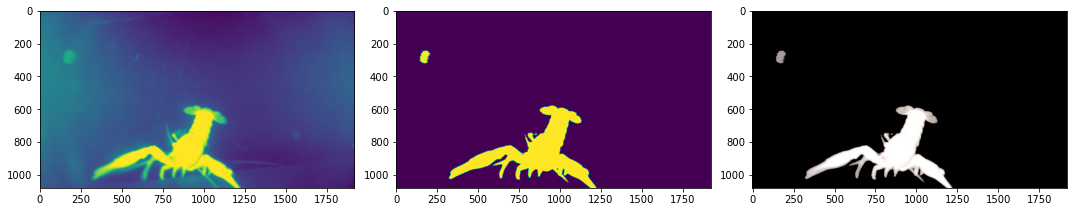

In [132]:
#Segmentation using Otsu Threshold:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path = './images/trap_test_4_16.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > (thresh*1)
filtered = filter_image(img, img_otsu)

fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(img_gray);
ax2[1].imshow(img_otsu);
ax2[2].imshow(filtered);
print('OTSU THRESHOLD :' + str(thresh))

OTSU THRESHOLD :156


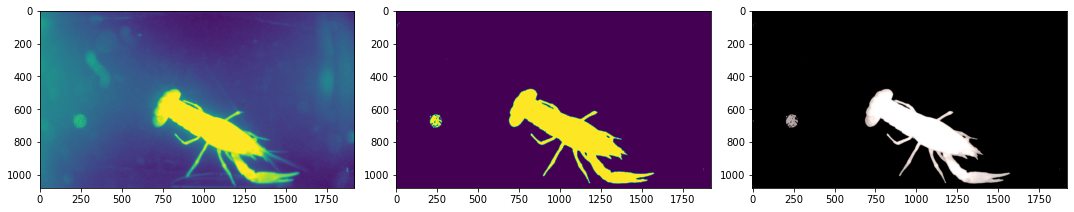

In [27]:
#Segmentation using Otsu Threshold:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='./images/angle_test_2_2.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > (thresh)
filtered = filter_image(img, img_otsu)

fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(img_gray);
ax2[1].imshow(img_otsu);
ax2[2].imshow(filtered);
print('OTSU THRESHOLD :' + str(thresh))

<br>
<br>

##### 1.02.03.04 OTSU Thresholding Groups:

- Finally, images with multiple crawfish subjects often had the greatest range of focus, the most median otsu thresholds, and the greatest segmentation accuracy over all. 

OTSU THRESHOLD :140


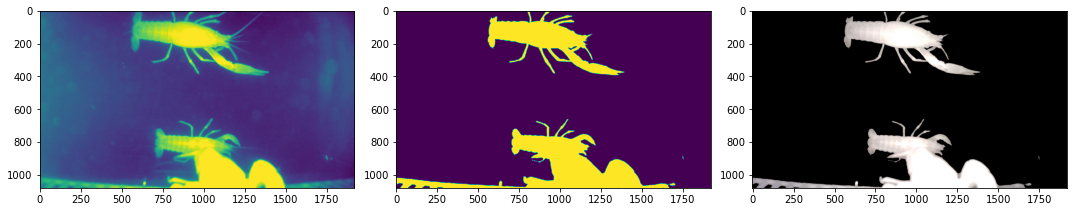

In [29]:
#Segmentation using Otsu Threshold:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='./images/angle_test_4_9.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > (thresh*1)
filtered = filter_image(img, img_otsu)

fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(img_gray);
ax2[1].imshow(img_otsu);
ax2[2].imshow(filtered);
print('OTSU THRESHOLD :' + str(thresh))

OTSU THRESHOLD :152


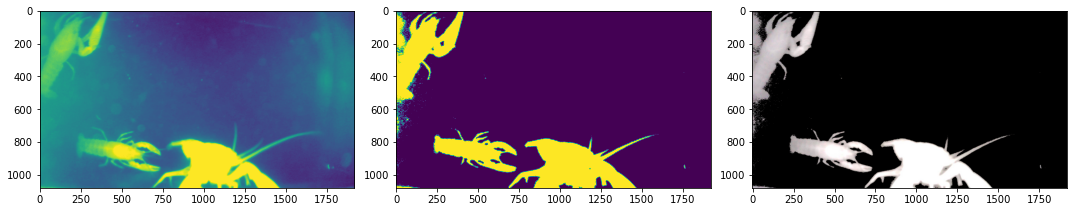

In [30]:
#Segmentation using color masking:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='./images/angle_test_4_7.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > (thresh*1)
filtered = filter_image(img, img_otsu)

fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(img_gray);
ax2[1].imshow(img_otsu);
ax2[2].imshow(filtered);
print('OTSU THRESHOLD :' + str(thresh))

<br>
<br>

#### 1.03 DATASET PREPARATION.
##### 1.03.01 Automated Capture:


- No object detection model yet exists that can detect aquatic arthropods. 
- Further, no dataset yet exists with sufficient images to train such a model.
- In order to train an object detection model for use in this project, an image data set had to be produced from scratch.
- Using the code block below, 7 different image sets were produced through automation.
- For each of these sets, different individuals, numbers of individual, and light levels were set up, and the CV camera would take 1 image every 5 seconds until approximated 300 images had been taken of each set up.
- These set ups consisted of a solo small sized crawfish in darkness, a solo medium sized crawfish in darkness, a solo large sized crawfish with only one large claw in darkness, a solo large sized crawfish with only one large claw in light, a small and large crawfish together in darkness, a medium sized and large sized crawfish together in darkness, and a medium sized and large sized crawfish together in light.
- Selections from these sessions were compiled to form a dataset of 1,639 images.

In [ ]:
#Code block for automated image intake:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

cam = cv2.VideoCapture(1)
print(type(cam))
img_counter = 0
if not cam.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cam.read()
    width = int(cam.get(3))
    height = int(cam.get(4))
    img = cv2.flip(frame, 1)
    cv2.imshow('IMAGE INTAKE', img)
    
    k = cv2.waitKey(1) 
    if k%256 == 27:
        print("Esc key hit, closing the app")
        break
    elif k%256 == 32:
        print('Automation Starting!')
        for i in range(300):
            ret, frame = cam.read()
            img = cv2.flip(frame, 1)
            img_name = "./auto_lighted/auto_light_set2_{}.jpg".format(img_counter)
            cv2.imwrite(img_name, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            print("Image {} Saved!".format(img_name))
            time.sleep(5)
            img_counter += 1
cam.release()
cv2.destroyAllWindows()

<br>
<br>

##### 1.03.02 Manual Labeling:

- Different labeling programs were experimented with, but ultimately I chose to use the platform Plainsight.
- I chose this workflow because I was able to move much faster through the images with the platform than with other labeling software.
- All 1,639 images were labeled by hand and all YOLOv4 compatible .txt files were exported for use in model training.
- The images were then divided into an 80%-10%-10% train-validation-test split.

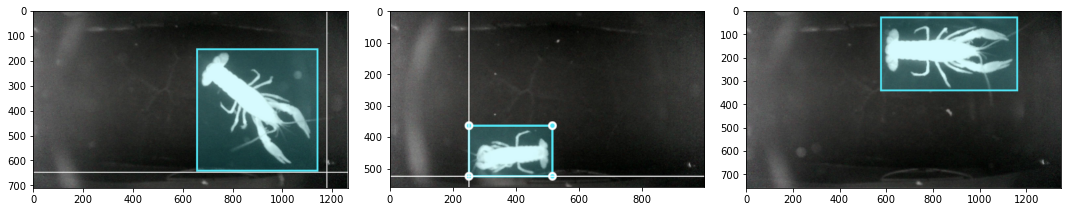

In [37]:
pic1 = cv2.imread('./visualizations/sc_01.png')
pic2 = cv2.imread('./visualizations/sc_02.png')
pic3 = cv2.imread('./visualizations/sc_03.png')
fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(pic1);
ax2[1].imshow(pic3);
ax2[2].imshow(pic2);

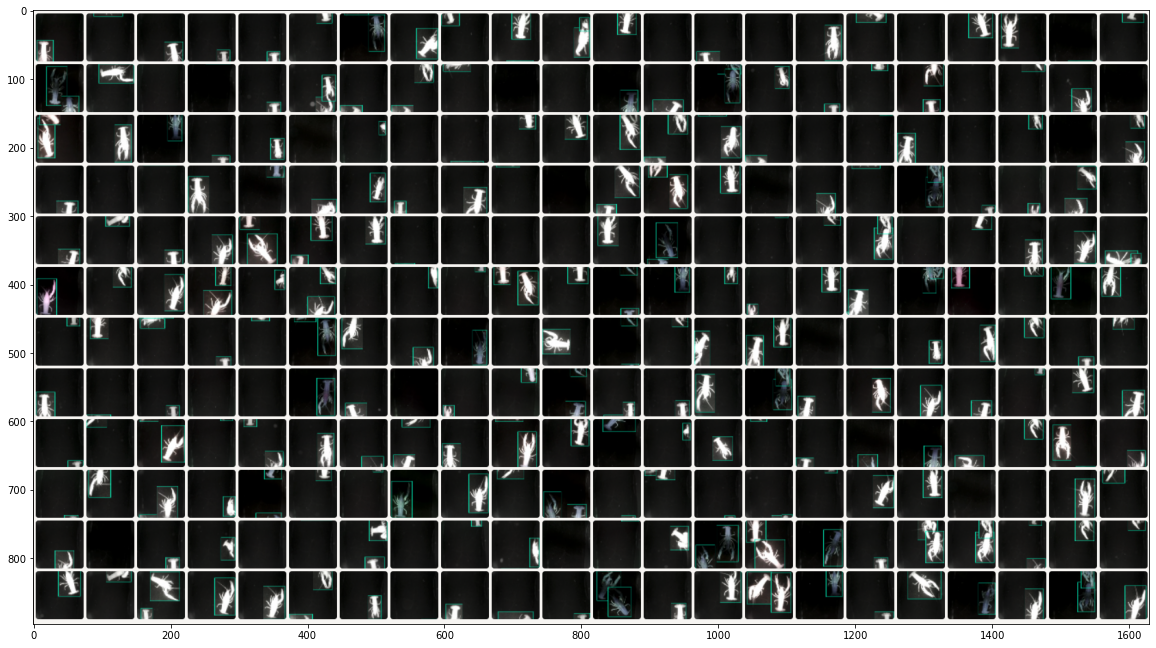

In [35]:
pic = cv2.imread('./visualizations/sc_06.png')
plt.figure(figsize=(20,20))
plt.imshow(pic);

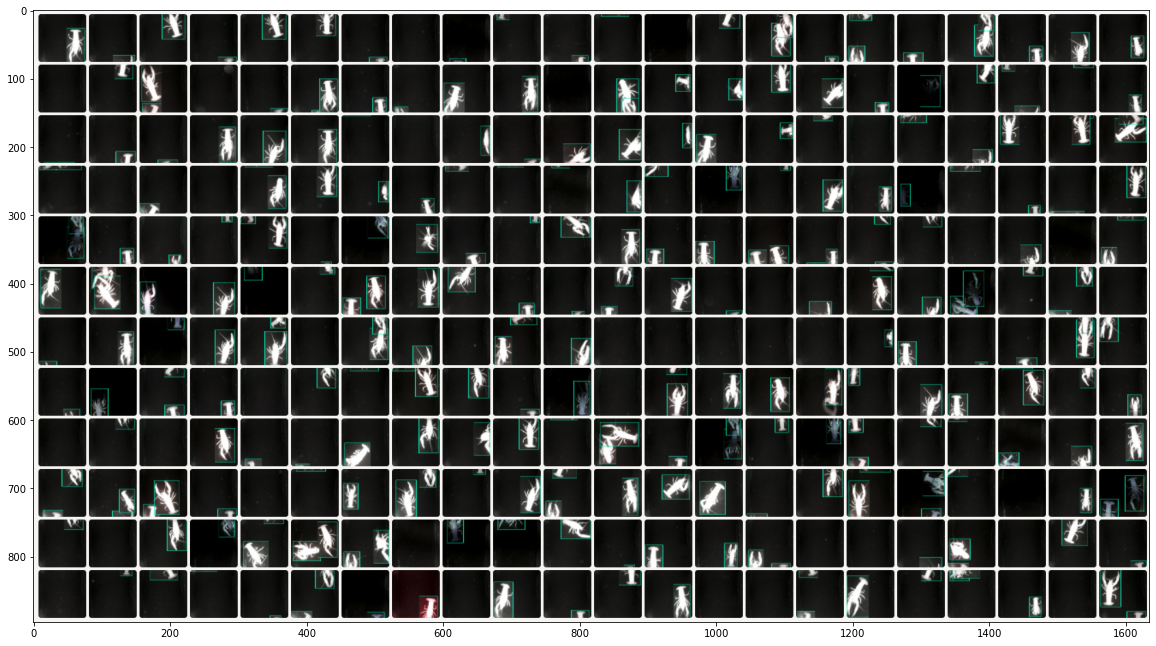

In [36]:
pic = cv2.imread('./visualizations/sc_07.png')
plt.figure(figsize=(20,20))
plt.imshow(pic);

<br>
<br>

#### 1.04 VIDEO CAPTURE EXPERIMENTATION.

- First, I needed to experiment with different USB CV webcams. 
- Here is a code block I could run that would allow me to open and close the camera from within the notebook.
- This allowed me to capture images manually with the space bar. 
- These were all saved locally. 
- Tweaks in the code block allowed me to variably title each set of images returned from each caputure session. 

In [7]:
#To record video 
import numpy as np
import os
import cv2

filename = 'craw_06.mp4'
frames_per_second = 20.0
res = '720p'

# Set resolution for the video capture
# Function adapted from https://kirr.co/0l6qmh
def change_res(cap, width, height):
    cap.set(3, width)
    cap.set(4, height)

# Standard Video Dimensions Sizes
STD_DIMENSIONS =  {"480p": (640, 480),"720p": (1280, 720),"1080p": (1920, 1080),"4k": (3840, 2160),}

# grab resolution dimensions and set video capture to it.
def get_dims(cap, res='1080p'):
    width, height = STD_DIMENSIONS["480p"]
    if res in STD_DIMENSIONS:
        width,height = STD_DIMENSIONS[res]
    ## change the current caputre device
    ## to the resulting resolution
    change_res(cap, width, height)
    return width, height

# Video Encoding, might require additional installs
# Types of Codes: http://www.fourcc.org/codecs.php
VIDEO_TYPE = {'.avi': cv2.VideoWriter_fourcc(*'XVID'),'.mp4': cv2.VideoWriter_fourcc(*'mp4v')}

def get_video_type(filename):
    filename, ext = os.path.splitext(filename)
    if ext in VIDEO_TYPE:
      return  VIDEO_TYPE[ext]
    return VIDEO_TYPE['.mp4']

cap = cv2.VideoCapture(1)
out = cv2.VideoWriter(filename, get_video_type(filename), frames_per_second, get_dims(cap, res))

while True:
    ret, frame = cap.read()
    out.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

<br>
<br>

#### 1.05 EDGE DETECTION BASED OBJECT MEASUREMENT.
##### 1.05.01 Dilation, Erosion, Adaptive Thresholding, and Edge Detection:

OTSU THRESHOLDS :88, 100, 155


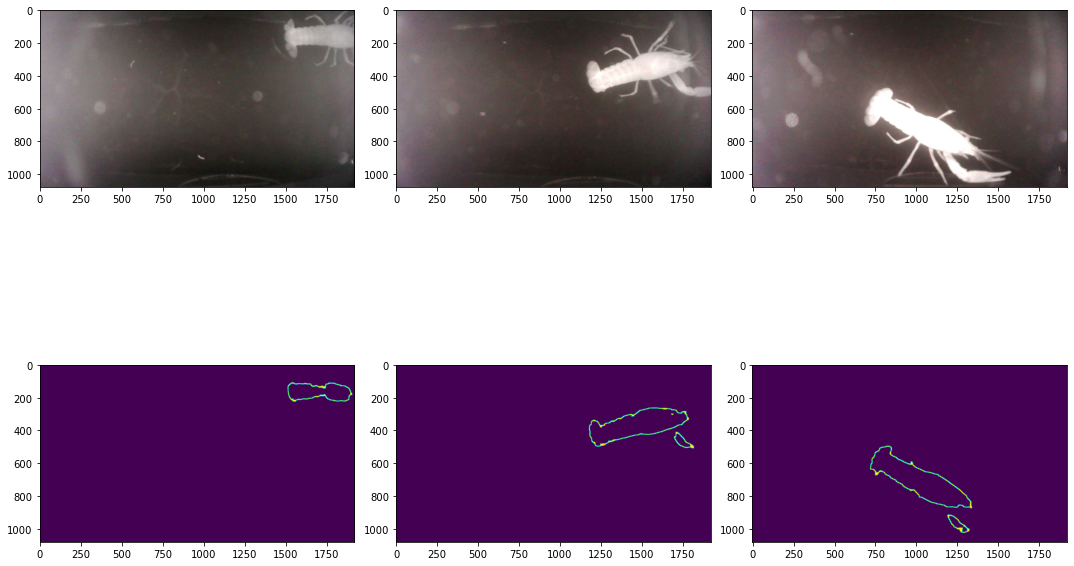

In [3]:
# This code shows how different images, through bluring, dilation, erosion, and adaptive otsu thresholding, can return similarly edge detected images: 
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from skimage.filters import threshold_otsu
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

image = cv2.imread("./images/trap_test_4_10.jpg")
image2 = cv2.imread("./images/angle_test_2_13.jpg")
image3 = cv2.imread("./images/angle_test_2_2.jpg")

def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(img_gray, (15, 15), 5)
mult = 1.9
thresh = threshold_otsu(gray)
img_otsu  = gray > (thresh*mult)
filtered = filter_image(image, img_otsu)
edged = cv2.Canny(filtered, 50, 100)
edged2 = cv2.dilate(edged, None, iterations=8)
edged3 = cv2.erode(edged2, None, iterations=6)

cnts = cv2.findContours(edged3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
while cnts == ((), None):
    mult -= .05
    img_otsu  = gray > (thresh * mult)
    filtered = filter_image(image, img_otsu)
    edged = cv2.Canny(filtered, 50, 100)
    edged2 = cv2.dilate(edged, None, iterations=8)
    edged3 = cv2.erode(edged2, None, iterations=6)
    cnts = cv2.findContours(edged3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_rgb=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(img_gray, (15, 15), 5)
mult = 1.9
thresh2 = threshold_otsu(gray)
img_otsu  = gray > (thresh2*mult)
filtered = filter_image(image2, img_otsu)
edged = cv2.Canny(filtered, 50, 100)
edged2 = cv2.dilate(edged, None, iterations=8)
edged3_2 = cv2.erode(edged2, None, iterations=6)

cnts = cv2.findContours(edged3_2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
while cnts == ((), None):
    mult -= .05
    img_otsu  = gray > (thresh2 * mult)
    filtered = filter_image(image2, img_otsu)
    edged = cv2.Canny(filtered, 50, 100)
    edged2 = cv2.dilate(edged, None, iterations=8)
    edged3 = cv2.erode(edged2, None, iterations=6)
    cnts = cv2.findContours(edged3_2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_rgb=cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(img_gray, (15, 15), 5)
mult = 1.9
thresh3 = threshold_otsu(gray)
img_otsu  = gray > (thresh3*mult)
filtered = filter_image(image3, img_otsu)
edged = cv2.Canny(filtered, 50, 100)
edged2 = cv2.dilate(edged, None, iterations=8)
edged3_3 = cv2.erode(edged2, None, iterations=6)

cnts = cv2.findContours(edged3_3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
while cnts == ((), None):
    mult -= .05
    img_otsu  = gray > (thresh3 * mult)
    filtered = filter_image(image3, img_otsu)
    edged = cv2.Canny(filtered, 50, 100)
    edged2 = cv2.dilate(edged, None, iterations=8)
    edged3_3 = cv2.erode(edged2, None, iterations=6)
    cnts = cv2.findContours(edged3_3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
fig2, ax2 = plt.subplots(2, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0,0].imshow(image);
ax2[0,1].imshow(image2);
ax2[0,2].imshow(image3);
ax2[1,0].imshow(edged3);
ax2[1,1].imshow(edged3_2);
ax2[1,2].imshow(edged3_3);
print('OTSU THRESHOLDS :' + str(thresh) + ', ' + str(thresh2) + ', ' + str(thresh3))
plt.savefig('./visualizations/otsu_1.png', transparent=True, bbox_inches = 'tight')

##### 1.05.02 Measurement Based on the Fine Tuning Above:
- Running the code below returns a pop up window, and by hitting the space bar, the image cycles through measuring each of the largest edge detections.
- This tactic of measurement really only works with single organisms, confirming the reasons as to why the bulk of current academic research seeks to measure from images only single organisms.
- Groups disrupt the thresholding and cause occulusion.

In [10]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from skimage.filters import threshold_otsu
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

#image = cv2.imread("./images/trap_test_4_10.jpg")
#image = cv2.imread("./images/angle_test_2_13.jpg")
image = cv2.imread("./images/angle_test_2_2.jpg")
img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(img_gray, (15, 15), 5)

def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])
mult = 1.9
thresh = threshold_otsu(gray)
img_otsu  = gray > (thresh*mult)
filtered = filter_image(image, img_otsu)

edged = cv2.Canny(filtered, 50, 100)
edged2 = cv2.dilate(edged, None, iterations=8)
edged3 = cv2.erode(edged2, None, iterations=6)
cnts = cv2.findContours(edged3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

while cnts == ((), None):
    mult -= .05
    img_otsu  = gray > (thresh * mult)
    filtered = filter_image(image, img_otsu)
    edged = cv2.Canny(filtered, 50, 100)
    edged2 = cv2.dilate(edged, None, iterations=8)
    edged3 = cv2.erode(edged2, None, iterations=6)
    cnts = cv2.findContours(edged3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = 280

for c in cnts:
    if cv2.contourArea(c) < 100:
        continue
    orig = image.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)
    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
        (255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
        (255, 0, 255), 2)

    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
    if pixelsPerMetric is None:
        pixelsPerMetric = dB / args["width"]

    dimA = dA / pixelsPerMetric
    dimB = dB / pixelsPerMetric
    cv2.putText(orig, "{:.1f}in".format(dimB),(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,0.65, (255, 255, 255), 2)
    cv2.putText(orig, "{:.1f}in".format(dimA),(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
    cv2.imshow("Image", orig)
    cv2.waitKey(0)

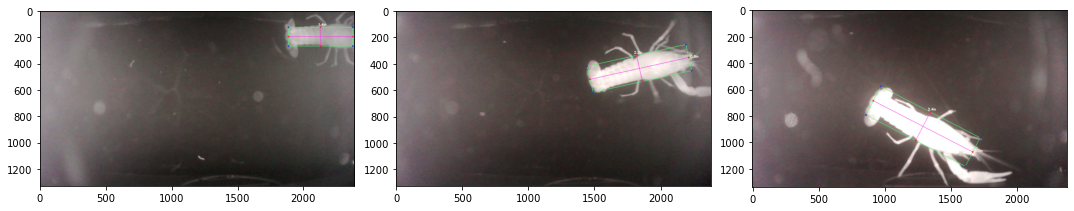

In [6]:
pic1 = cv2.imread('./visualizations/m_01.png')
pic2 = cv2.imread('./visualizations/m_02.png')
pic3 = cv2.imread('./visualizations/m_03.png')
fig2, ax2 = plt.subplots(1, 3, figsize=(15,10))
fig2.tight_layout()
ax2[0].imshow(pic2);
ax2[1].imshow(pic1);
ax2[2].imshow(pic3);

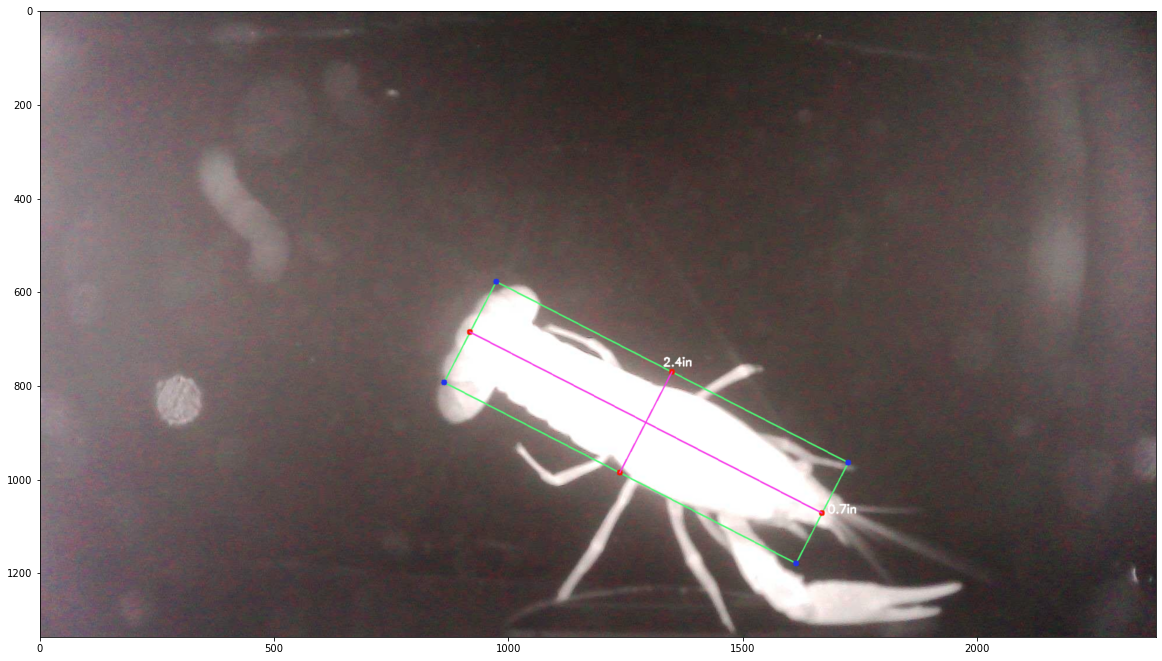

In [9]:
pic = cv2.imread('./visualizations/m_03.png')
plt.figure(figsize=(20,20))
plt.imshow(pic);